TECH CHALLENGE I

Guilherme Duarte de Andrade Tavares

guilherme.tavares@virgo.inc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/Users/guilhermetavares/Downloads/encargos.csv'

In [3]:
#Carregando o dataset
df = pd.read_csv(path)

In [4]:
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,não,sudeste,1725.55230
2,28,masculino,33.000,3,não,sudeste,4449.46200
3,33,masculino,22.705,0,não,noroeste,21984.47061
4,32,masculino,28.880,0,não,noroeste,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   gênero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   região    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
correlation_matrix = df.corr()
correlation_matrix

,idade,imc,filhos,encargos
idade,1.000000,0.109272,0.042469,0.299008
imc,0.109272,1.000000,0.012759,0.198341
filhos,0.042469,0.012759,1.000000,0.067998
encargos,0.299008,0.198341,0.067998,1.000000


In [8]:
df.groupby('gênero').describe()

idade                                                         imc  \
           count       mean        std   min   25%   50%    75%   max  count   
gênero                                                                         
feminino   662.0  39.503021  14.054223  18.0  27.0  40.0  51.75  64.0  662.0   
masculino  676.0  38.917160  14.050141  18.0  26.0  39.0  51.00  64.0  676.0   

                      ... filhos      encargos                              \
                mean  ...    75%  max    count          mean           std   
gênero                ...                                                    
feminino   30.377749  ...    2.0  5.0    662.0  12569.578844  11128.703801   
masculino  30.943129  ...    2.0  5.0    676.0  13956.751178  12971.025915   

                                                                        
                 min        25%         50%           75%          max  
gênero                                                                  
feminino   1607.5101  4885.1587  9412.96250  14454.691825  63770.42801  
masculino  1121.8739  4619.1340  9369.61575  18989.590250  62592.87309  

[2 rows x 32 columns]

É possível notar um ligeiro aumento na média dos encargos para homens em comparação com as mulheres.

In [15]:
df.groupby('fumante').describe()

idade                                                          imc  \
          count       mean        std   min    25%   50%   75%   max   count   
fumante                                                                        
não      1064.0  39.385338  14.083410  18.0  26.75  40.0  52.0  64.0  1064.0   
sim       274.0  38.514599  13.923186  18.0  27.00  38.0  49.0  64.0   274.0   

                    ... filhos      encargos                              \
              mean  ...    75%  max    count          mean           std   
fumante             ...                                                    
não      30.651795  ...    2.0  5.0   1064.0   8434.268298   5993.781819   
sim      30.708449  ...    2.0  5.0    274.0  32050.231832  11541.547176   

                                                                           
                min           25%          50%           75%          max  
fumante                                                                    
não       1121.8739   3986.438700   7345.40530  11362.887050  36910.60803  
sim      12829.4551  20826.244213  34456.34845  41019.207275  63770.42801  

[2 rows x 32 columns]

Já quando analisamos a variável 'fumante' vemos que a média aumenta muito para os casos positivos em relação as pessoas que não fumam.

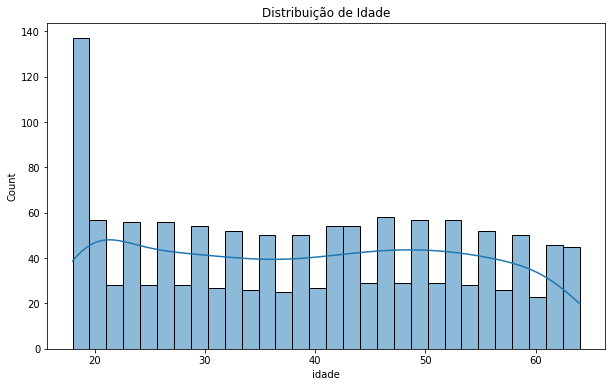

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['idade'], kde=True, bins=30)
plt.title('Distribuição de Idade')
plt.show()

A base possui predominância de pessoas mais jovens como podemos ver pela coluna maior a esquerda.

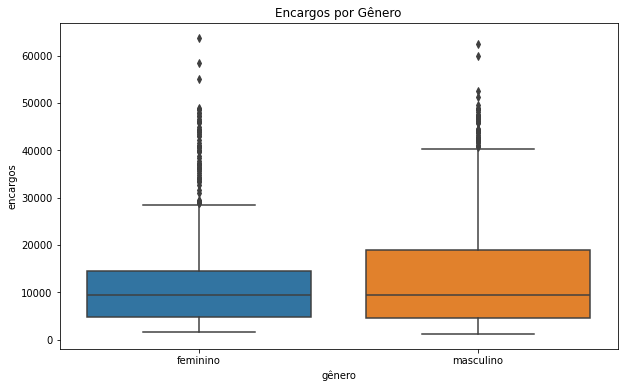

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gênero', y='encargos', data=df)
plt.title('Encargos por Gênero')
plt.show()

Não parece haver grandes diferenças de encargos considerando a variável gênero apenas. Ambos os casos possuem bastante outliers (provavelmente explicados por alguma outra variável que seja mais relevante para a variável encargos). A mediana é bastante próxima para ambos os casos também.

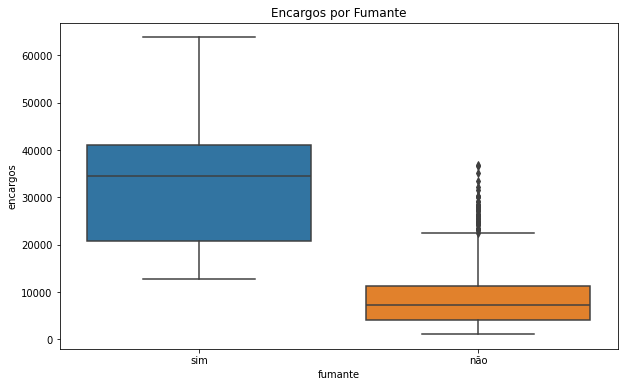

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fumante', y='encargos', data=df)
plt.title('Encargos por Fumante')
plt.show()

O boxplot mostra que fumantes têm encargos significativamente mais altos e maior variação nos valores, com uma mediana muito superior em comparação aos não fumantes. Os não fumantes apresentam encargos mais baixos e concentrados, com menos dispersão e alguns outliers. Isso sugere uma forte associação entre fumar e encargos mais elevados.

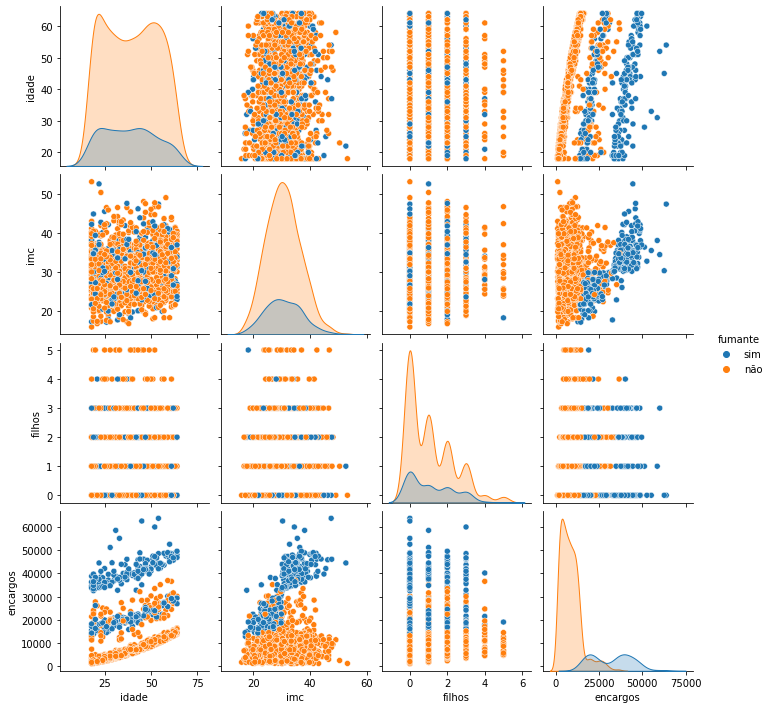

In [13]:
sns.pairplot(df, hue='fumante', diag_kind='kde')
plt.show()

O pairplot acima permite visualizar que há uma clara distinção entre encargos principalmente quando se trata de uma pessoa fumante. A combinanção de pessoas mais velhas e fumantes bem como a pessoas com IMC mais elevado e fumantes acarretam em valores de encargos mais altos ainda.

In [17]:
# Verificando valores faltantes
df.isnull().sum()


idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

Não temos valores nulos na base, logo não será necessário fazer uma limpeza deles.

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gênero'] = label_encoder.fit_transform(df['gênero'])
df['fumante'] = label_encoder.fit_transform(df['fumante'])

df.head()


,idade,gênero,imc,filhos,fumante,encargos,região_noroeste,região_sudeste,região_sudoeste
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


Aplicando Label Encoder para transformar as variáveis categóricas em numéricas para facilar o uso em modelos de machine learning.

In [18]:
df = pd.get_dummies(df, columns=['região'], drop_first=True)

df.head()

,idade,gênero,imc,filhos,fumante,encargos,região_noroeste,região_sudeste,região_sudoeste
0,19,feminino,27.900,0,sim,16884.92400,0,0,1
1,18,masculino,33.770,1,não,1725.55230,0,1,0
2,28,masculino,33.000,3,não,4449.46200,0,1,0
3,33,masculino,22.705,0,não,21984.47061,1,0,0
4,32,masculino,28.880,0,não,3866.85520,1,0,0


Utilização de One-Hot Encoding na variável 'região' para transforma-la  em várias colunas binárias (indicadores 0 ou 1). Nesse caso foi usado o One-Hot já que a variável categórica não possui nenhuma relação de magnitude entre seus possíveis valores, ou seja, não possui uma ordem especifica.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            1338 non-null   int64  
 1   gênero           1338 non-null   int64  
 2   imc              1338 non-null   float64
 3   filhos           1338 non-null   int64  
 4   fumante          1338 non-null   int64  
 5   encargos         1338 non-null   float64
 6   região_noroeste  1338 non-null   uint8  
 7   região_sudeste   1338 non-null   uint8  
 8   região_sudoeste  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


In [28]:
corr_matrix = df.corr()

In [50]:
corr_matrix["encargos"]

idade              0.299008
gênero             0.057292
imc                0.198341
filhos             0.067998
fumante            0.787251
encargos           1.000000
região_noroeste   -0.039905
região_sudeste     0.073982
região_sudoeste   -0.043210
Name: encargos, dtype: float64

Fumante: A maior correlação positiva com encargos é a variavel fumante (0.787), indicando que o fato de ser fumante está fortemente associado ao aumento de encargos.

Idade: A idade tem uma correlação positiva (~ 0.3) com os encargos. Isso indica que, à medida que a idade aumenta, os encargos tendem a ser maiores, mas essa relação é moderada.

IMC: Mesma coisa com o IMC, existe uma correlaçao positiva (~ 0.2) entre o IMC e os encargos, sugerindo que um quanto maior o IMC, maior os encargos.

Agora realizerei a predição utilizando dois modelos: Regressão linear e árvore de decisão. 

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('encargos', axis=1)
y = df['encargos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Regressão Linear - MAE: {mae_linear}, MSE: {mse_linear}, R²: {r2_linear}')


Regressão Linear - MAE: 4181.194473753649, MSE: 33596915.85136145, R²: 0.7835929767120724


In [43]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

# Definindo os parâmetros para o GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Ajustando o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train)

# Verificando os melhores hiperparâmetros encontrados
print(f'Melhores Hiperparâmetros: {grid_search.best_params_}')

# Avaliando o modelo com os melhores hiperparâmetros no conjunto de teste
best_tree_model = grid_search.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test)

# Avaliando o modelo otimizado
mae_best_tree = mean_absolute_error(y_test, y_pred_best_tree)
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
r2_best_tree = r2_score(y_test, y_pred_best_tree)

print(f'Árvore de Decisão Otimizada - MAE: {mae_best_tree}, MSE: {mse_best_tree}, R²: {r2_best_tree}')


Melhores Hiperparâmetros: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
Árvore de Decisão Otimizada - MAE: 2671.6334159207117, MSE: 20416835.699502125, R²: 0.8684895167688762


A fim de melhorar a performance do modelo, utilizei o GridSearchCV para encontrar a melhor combinanção de hiperparâmetros já que essa técnica permite testar diversas em busca da otimização da métrica desejada.

In [45]:
from sklearn.model_selection import cross_val_score

# Validação cruzada para Regressão Linear
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Regressão Linear - MAE CV: {-cv_scores_linear.mean()}')

# Validação cruzada para Árvore de Decisão
cv_scores_tree = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Árvore de Decisão - MAE CV: {-cv_scores_tree.mean()}')


Regressão Linear - MAE CV: 4197.722970468898
Árvore de Decisão - MAE CV: 3132.7375004132095


Acima utilizo a função cross_val_score que permite dividir os dados em várias partes (folds) e avaliar o modelo com dsitintos subconjuntos dos dados, garantindo uma avaliaçao mais confiável.

In [46]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

linear_model_sm = sm.OLS(y_train, X_train_sm).fit()

linear_model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               encargos   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          1.32e-305
Time:                        19:37:09   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.193e+04   1114.505    -10.705      0.000   -1.41e+04   -9744.335
idade             256.9757     13.477     19.067      0.000     230.530     283.421
gênero            -18.5917    376.175     -0.049      0.961    -756.722     719.539
imc               337.0926     32.471     10.381      0.000     273.378     400.807
filhos            425.2788    154.655      2.750      0.006     121.814     728.743
fumante          2.365e+04    466.505     50.699      0.000    2.27e+04    2.46e+04
região_noroeste  -370.6773    536.873     -0.690      0.490   -1424.130     682.776
região_sudeste   -657.8643    539.791     -1.219      0.223   -1717.043     401.314
região_sudoeste  -809.7994    535.208     -1.513      0.131   -1859.986     240.387
==============================================================================
Omnibus:                      252.330   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.798
Skew:                           1.253   Prob(JB):                    5.19e-134
Kurtosis:                       5.737   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Realizando a validação apenas do modelo de regressão linear podemos ver que o R quadrado ficou em 0.742, ou seja, por ser alto ele indica um bom ajuste ao modelo.

Além disso, os coeficientes mostram que Idade e Fumante são as são as variáveis mais relevantes para explicar os modelos, ambas com p-valor = 0, corroborando o fato de serem significativas.

In [49]:
testes = pd.DataFrame({
    'idade': [25, 45, 35, 60, 50],
    'gênero': [0, 1, 1, 0, 0],  # 0: feminino, 1: masculino 
    'imc': [22.5, 28.0, 26.7, 30.1, 27.5],
    'filhos': [1, 3, 2, 0, 4],
    'fumante': [1, 0, 0, 1, 1],  # 1: fumante, 0: não fumante
    'região_noroeste': [0, 1, 0, 0, 0],  
    'região_sudeste': [0, 0, 1, 0, 0], 
    'região_sudoeste': [1, 0, 0, 1, 1] 
})

testes = sm.add_constant(testes)

previsoes = linear_model_sm.predict(testes)

resultados = testes.copy()
resultados['Pred. Encargos'] = previsoes

# Exibindo os resultados
resultados[['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região_noroeste', 'região_sudeste', 'região_sudoeste', 'Pred. Encargos']]

,idade,gênero,imc,filhos,fumante,região_noroeste,região_sudeste,região_sudoeste,Pred. Encargos
0,25,0,22.5,1,1,0,0,1,25344.364299
1,45,1,28.0,3,0,1,0,0,9957.846499
2,35,1,26.7,2,0,0,1,0,6237.403370
3,60,0,30.1,0,1,0,0,1,36475.138615
4,50,0,27.5,4,1,0,0,1,34730.056056
